# Gemaakt op 12/05/2025 door martijn

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st

## Portfolio assignment 15
30 min: Train a decision tree to predict the species of a **penguin** based on their characteristics.
- Prepare the data:
    - <b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to:
         - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
         - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree.
- Use your decision tree model to make predictions for both the train and test set.

![](https://i.imgur.com/0v1CGNV.png)<br>
- Calculate the accuracy for both the train set predictions and test set predictions
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree_classification function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
- Which depth and features did you add per cycle?
- Optional: Perform the same tasks but try to predict the sex of the pinguin based on the other columns<br>
<br>

Findings: ...


In [2]:
penguins = sns.load_dataset("penguins")
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(penguins['body_mass_g'].mean())
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(penguins['bill_depth_mm'].mean())
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].mean())


hier heb ik de NaN values van alle rows aangepast. alle numeric velden hebben nu de `mean` als waarde

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [5]:
penguins_train, penguins_test = train_test_split(penguins, test_size=0.3, random_state=42, stratify=penguins['species'])
print(penguins_train.shape, penguins_test.shape)

(240, 7) (104, 7)


nu hebben we de data gesplit in een test dataset en trainign dataset.

In [6]:
features= ['body_mass_g']
dt = DecisionTreeClassifier(max_depth = 5) # Increase max_depth to see effect in the plot
dt.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=5)

nu hebben we alleen een tree op body mass, om te kijken of dit accuraat genoeg is


In [7]:
from sklearn import tree
import graphviz
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")

    return (predictions == actuals).sum() / len(actuals)

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None,
                          feature_names=features,
                          class_names=class_names,
                          filled=True, rounded=True,
                          special_characters=True)

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph

In [8]:
predictions = dt.predict(penguins_train[features])
predictions

array(['Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Chinstrap',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Ad

In [9]:
calculate_accuracy(predictions, penguins_train.species)

np.float64(0.7583333333333333)

nu met de code hierboven hebben we de predictions getest en zien we dat het niet helemaal klopt. een 0.75 accuracy is een beetje laag, laten we nog een colom toevoegen.

In [10]:
features= ['body_mass_g', 'bill_depth_mm']
dt = DecisionTreeClassifier(max_depth = 5) # Increase max_depth to see effect in the plot
dt.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=5)

In [11]:
predictions = dt.predict(penguins_train[features])
predictions

array(['Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'A

In [12]:
calculate_accuracy(predictions, penguins_train.species)

np.float64(0.8125)

okay dat helpt iets, maar zou de depth van de tree aanpassen ook helpen? ik denk dat het met 0.1 omhoog zal gaan.

In [13]:
features= ['body_mass_g', 'bill_depth_mm']
dt = DecisionTreeClassifier(max_depth = 10, random_state=42)
dt.fit(penguins_train[features], penguins_train['species'])

DecisionTreeClassifier(max_depth=10, random_state=42)

In [14]:
predictions = dt.predict(penguins_train[features])
predictions
calculate_accuracy(predictions, penguins_train.species)

np.float64(0.8958333333333334)

okay dit werkt. Laten we nu kijken wat de optimale depth is.
(ik heb seed toegevoegd omdat random irritant was)

In [15]:
features= ['body_mass_g', 'bill_depth_mm']
for x in range(1,25):
    dt = DecisionTreeClassifier(max_depth = x, random_state=42)
    dt.fit(penguins_train[features], penguins_train['species'])
    predictions = dt.predict(penguins_train[features])
    predictions
    print(f"Bij {x} is de accuracy: {calculate_accuracy(predictions, penguins_train.species)}")

Bij 1 is de accuracy: 0.7666666666666667
Bij 2 is de accuracy: 0.8041666666666667
Bij 3 is de accuracy: 0.8041666666666667
Bij 4 is de accuracy: 0.8083333333333333
Bij 5 is de accuracy: 0.8125
Bij 6 is de accuracy: 0.8375
Bij 7 is de accuracy: 0.8416666666666667
Bij 8 is de accuracy: 0.8583333333333333
Bij 9 is de accuracy: 0.8708333333333333
Bij 10 is de accuracy: 0.8958333333333334
Bij 11 is de accuracy: 0.9208333333333333
Bij 12 is de accuracy: 0.9458333333333333
Bij 13 is de accuracy: 0.9583333333333334
Bij 14 is de accuracy: 0.975
Bij 15 is de accuracy: 0.9833333333333333
Bij 16 is de accuracy: 0.9875
Bij 17 is de accuracy: 0.9875
Bij 18 is de accuracy: 0.9916666666666667
Bij 19 is de accuracy: 0.9916666666666667
Bij 20 is de accuracy: 0.9916666666666667
Bij 21 is de accuracy: 0.9916666666666667
Bij 22 is de accuracy: 0.9916666666666667
Bij 23 is de accuracy: 0.9916666666666667
Bij 24 is de accuracy: 0.9916666666666667


hieruit kan ik concluderen dat na depth 18 alles het zelfde is en het meest accuraat, maar vanaf 20 zit het al boven de 0.95. Is dit ook zo als ik nog een colom toevoeg? ik denk dat het alleen maar langer gaat duren voor correcte filter.

In [16]:
features= ['body_mass_g', 'bill_depth_mm', 'bill_length_mm']
for x in range(1,15):
    dt = DecisionTreeClassifier(max_depth = x, random_state=42)
    dt.fit(penguins_train[features], penguins_train['species'])
    predictions = dt.predict(penguins_train[features])
    predictions
    print(f"Bij {x} is de accuracy: {calculate_accuracy(predictions, penguins_train.species)}")

Bij 1 is de accuracy: 0.7708333333333334
Bij 2 is de accuracy: 0.95
Bij 3 is de accuracy: 0.9708333333333333
Bij 4 is de accuracy: 0.9916666666666667
Bij 5 is de accuracy: 0.9958333333333333
Bij 6 is de accuracy: 1.0
Bij 7 is de accuracy: 1.0
Bij 8 is de accuracy: 1.0
Bij 9 is de accuracy: 1.0
Bij 10 is de accuracy: 1.0
Bij 11 is de accuracy: 1.0
Bij 12 is de accuracy: 1.0
Bij 13 is de accuracy: 1.0
Bij 14 is de accuracy: 1.0


nu zien we spontaan dat alles na 5 het nummer 1 is, dus ik denk dat hij daarna de tree niet langer maakt, en dus 6 gwn een goede max depth is. Maar die extra colomn maakte het dus juist accurater. En vanaf depth 3 is het al boven de 0.95

nu is het tijd om de trees te testen met de test dataset.

ik denk dat de beste tree die we hebben, degene met 6 depth en alle 3 de numerical columns. Ik denk dat deze tree die met de train data een `1` scoorde, met de test data een `0.94` zal scoren. Ik heb zo'n vermoeden.

In [17]:
features= ['body_mass_g', 'bill_depth_mm', 'bill_length_mm']
dt = DecisionTreeClassifier(max_depth = 6, random_state=42)
dt.fit(penguins_train[features], penguins_train['species'])
predictions = dt.predict(penguins_test[features])
predictions
print(f"Bij 6 is de accuracy: {calculate_accuracy(predictions, penguins_test.species)}")

Bij 6 is de accuracy: 0.9423076923076923


bahhahaha, lol het is srs 0.94
Kan ik dit verklaren? nope. het was een lucky guess. xD

De rede dat het lager ligt is wel logisch aangezien je een tree maakt op de data die je hebt, en je het test met nieuwe data. Dus er zal altijd wel ergens een uitzondering zijn.

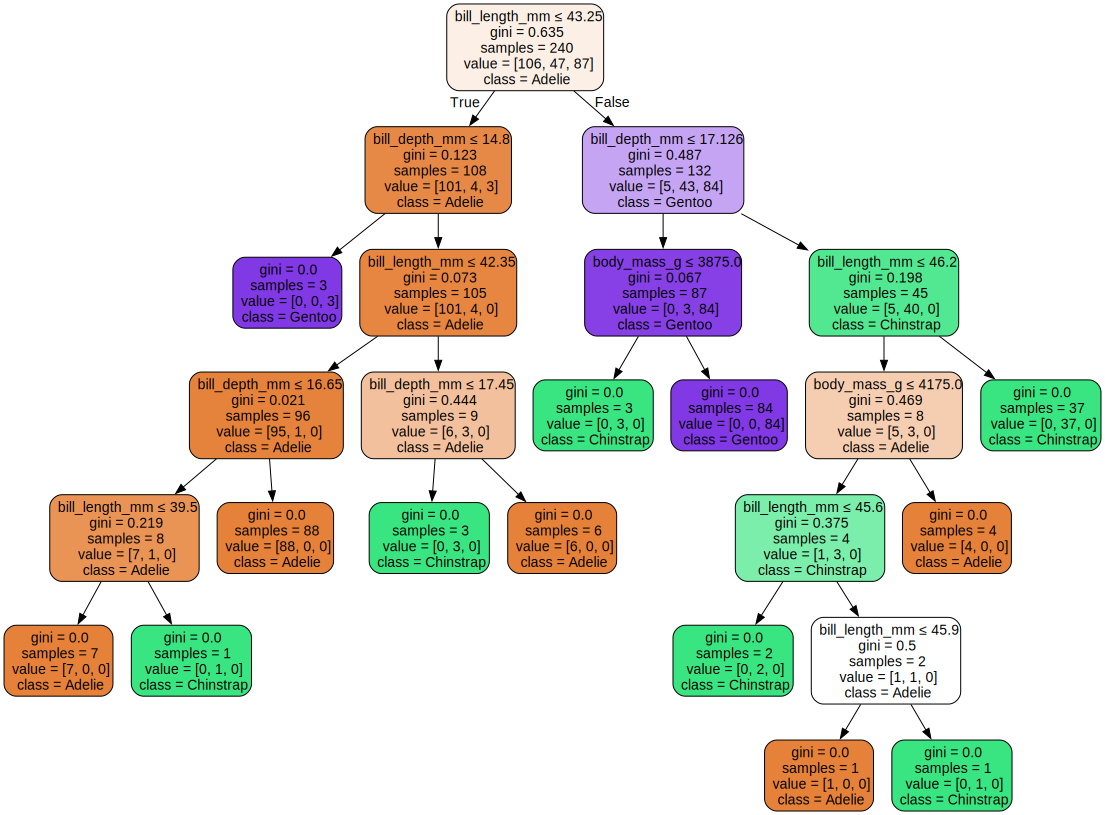

In [18]:
plot_tree_classification(dt, features, np.sort(penguins_train.species.unique()))

hier hebben we de visualisatie van de tree. Ik weet niet echt wat ik er over kan mentionen.
de gini betekent hoe puur de set is op de plek, de hoger het nummer, de minder puut. daarom eindigt alles met een gini van 0.


nu gaan we nog even de difference bekijken tussen de test en trainign set:


In [19]:
predictionsOnTrainset = dt.predict(penguins_train[features])
predictionsOnTestset = dt.predict(penguins_test[features])
accuracyTrain = calculate_accuracy(predictionsOnTrainset, penguins_train.species)
accuracyTest = calculate_accuracy(predictionsOnTestset, penguins_test.species)
print("Accuracy training set " + str(accuracyTrain))
print("Accuracy test set     " + str(accuracyTest))

Accuracy training set 1.0
Accuracy test set     0.9423076923076923


wat heb ik geleerd?
- een max_depth rondt de 5 is goed genoeg, daarna verandert er niet zoveel, maar kost wel meer processing.
- het toevoegen van de 3e, 'bill_length_mm' maakte het meeste effect
- dat deze decision trees best logisch zijn. dit is ook hoe ik "wie is het" speel

## findings
er zit 0.06 verschil tussen de 2 sets, en zijn bijna perfect. Dat vind ik interessant